# Import Libraries

In [332]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy.contrasts import Sum
import warnings

In [333]:
from __future__ import division, print_function
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

## Generate dataset
* Dataset includes different smartphone key features and a conjoint analysis survey where participants choose their preferred smartphone 

In [334]:
brand = ["samusang", "Hauweii", "apple", "Gtel", "Itel"]
screen_size=["large","medium", "small"]

data = {
    'brand': np.random.choice(brand, 50),
    'screen_size': np.random.choice(screen_size, 50),
    'storage': np.random.randint(100,500,50),
    'ram_size': np.random.randint(2,8,50),
    'battery(mph)': np.random.randint(100,1000,50),
    'camera(pixels)' : np.random.randint(10,100,50),
    'price(usd)': np.random.randint(60,1000,50),
    'preference': np.random.randint(0,11, 50)
}
df = pd.DataFrame(data)

In [335]:
#Export generated data to csv
df.to_csv("dataset/smartphones.csv", index=False)

#Import saved csv file
smartphones = pd.read_csv("dataset/smartphones.csv")

## Explore and clean data

In [336]:
smartphones.head(20)

,brand,screen_size,storage,ram_size,battery(mph),camera(pixels),price(usd),preference
0,Itel,medium,282,7,449,81,491,8
1,apple,large,189,2,635,90,201,5
2,Hauweii,large,396,6,914,66,580,10
3,samusang,small,114,7,951,96,243,7
4,Itel,large,168,5,622,73,217,9
5,samusang,small,203,4,153,28,133,2
6,Hauweii,large,464,6,630,34,191,8
7,samusang,medium,492,2,569,17,980,7
8,apple,large,365,7,765,70,774,2
9,samusang,small,327,3,589,21,516,3


In [337]:
smartphones.columns

Index(['brand', 'screen_size', 'storage', 'ram_size', 'battery(mph)',
       'camera(pixels)', 'price(usd)', 'preference'],
      dtype='object')

<Axes: xlabel='preference'>

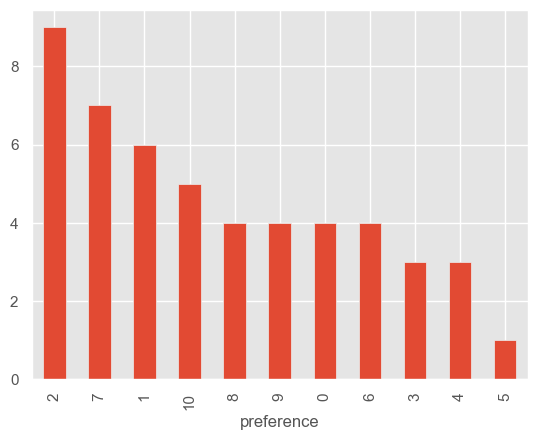

In [338]:
smartphones.preference.value_counts().plot(kind='bar')

In [339]:
smartphones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   brand           50 non-null     object
 1   screen_size     50 non-null     object
 2   storage         50 non-null     int64 
 3   ram_size        50 non-null     int64 
 4   battery(mph)    50 non-null     int64 
 5   camera(pixels)  50 non-null     int64 
 6   price(usd)      50 non-null     int64 
 7   preference      50 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 3.3+ KB


In [340]:
smartphones.isna().sum()

brand             0
screen_size       0
storage           0
ram_size          0
battery(mph)      0
camera(pixels)    0
price(usd)        0
preference        0
dtype: int64

### Using pair plot and preference as our hue we can see most prefered features 

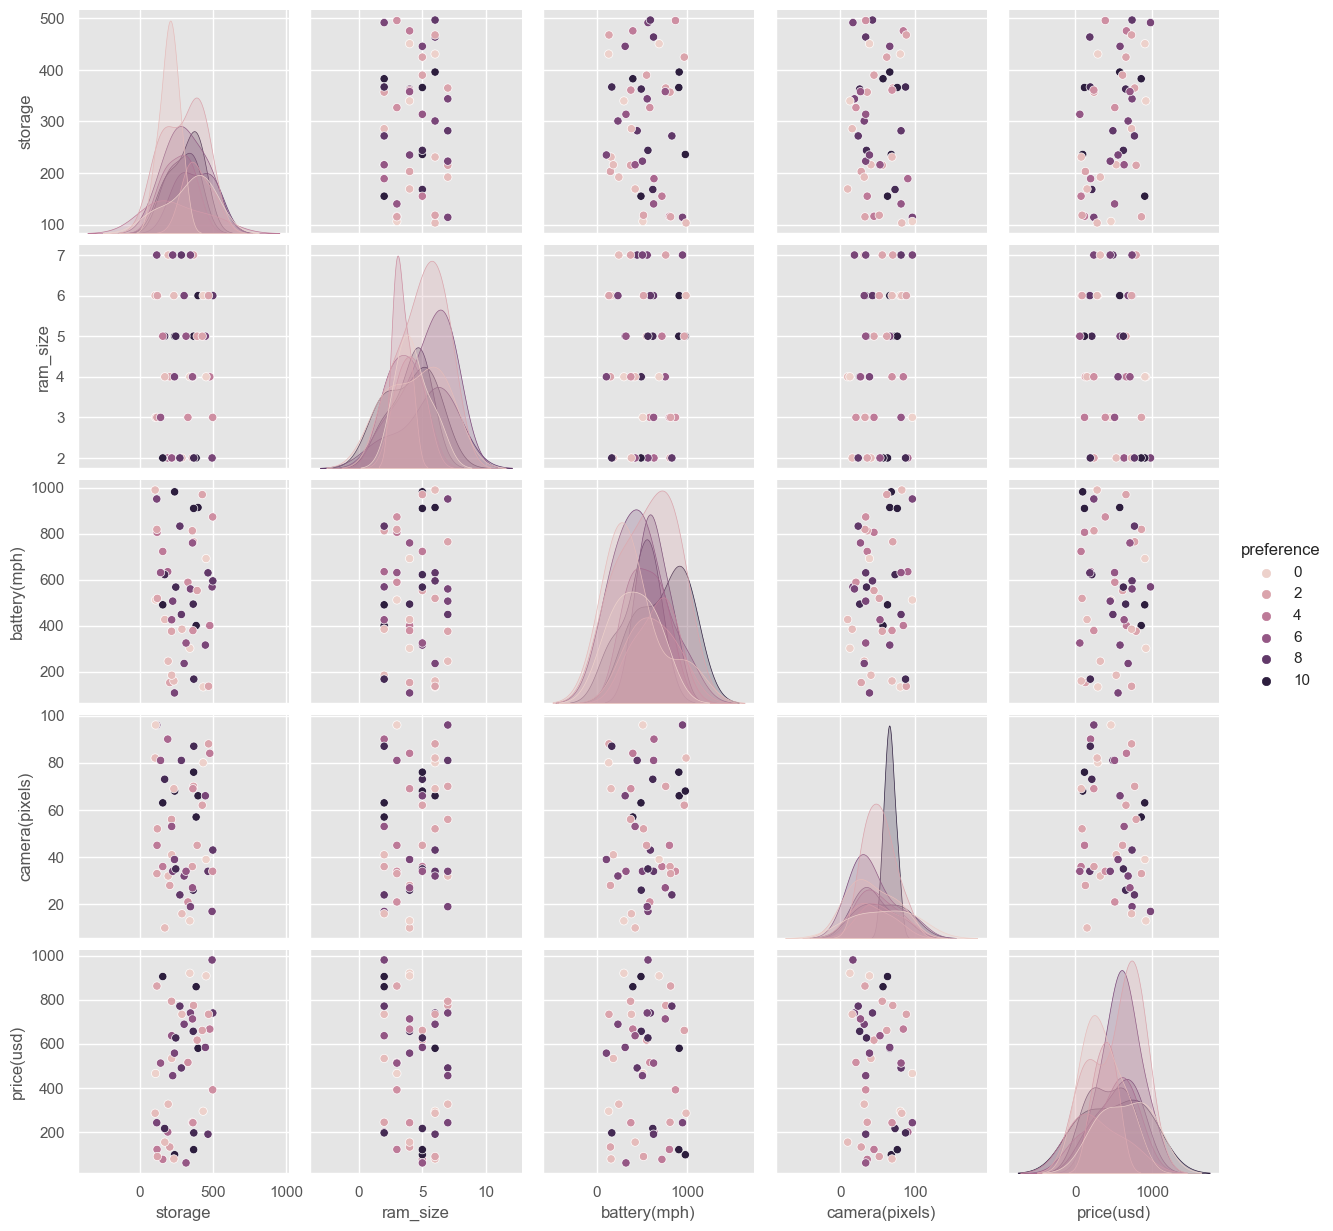

In [341]:
sns.pairplot(data=smartphones, hue="preference")

In [342]:
var = ['storage', 'ram_size', 'battery(mph)',
 'camera(pixels)', 'price(usd)', 'preference']
smartphones_corr = smartphones[var].corr()
smartphones_corr

,storage,ram_size,battery(mph),camera(pixels),price(usd),preference
storage,1.000000,0.033574,-0.073614,-0.109017,0.348112,0.113642
ram_size,0.033574,1.000000,0.011318,0.168592,-0.165041,-0.010816
battery(mph),-0.073614,0.011318,1.000000,0.070203,-0.047754,0.196132
camera(pixels),-0.109017,0.168592,0.070203,1.000000,-0.248432,0.094281
price(usd),0.348112,-0.165041,-0.047754,-0.248432,1.000000,0.037639
preference,0.113642,-0.010816,0.196132,0.094281,0.037639,1.000000


<Axes: >

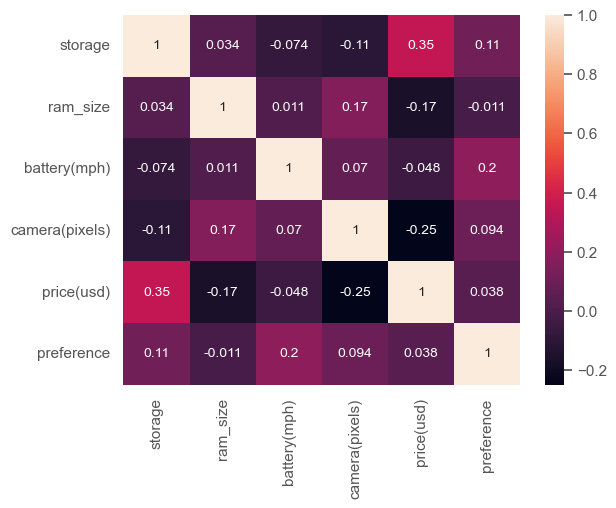

In [343]:
sns.heatmap(smartphones_corr, annot=True)

## Running Linear Regression To Identify Features that Have the Most Impact on Ranking 

In [344]:
smartphones_dum = pd.get_dummies(smartphones.iloc[:,:-1], columns=smartphones.iloc[:,:-1].columns)
smartphones_dum = smartphones_dum.astype(int)
smartphones_dum.head(20)

,brand_Gtel,brand_Hauweii,brand_Itel,brand_apple,brand_samusang,screen_size_large,screen_size_medium,screen_size_small,storage_103,storage_106,storage_114,storage_115,storage_116,storage_118,storage_140,storage_155,storage_168,storage_169,storage_189,storage_192,storage_203,storage_215,storage_216,storage_223,storage_231,storage_235,storage_236,storage_244,storage_272,storage_282,storage_286,storage_301,storage_314,storage_327,storage_340,storage_344,storage_357,storage_358,storage_361,storage_363,storage_365,storage_366,storage_367,storage_383,storage_390,storage_396,storage_425,storage_431,storage_446,storage_451,storage_464,storage_468,storage_476,storage_492,storage_496,storage_497,ram_size_2,ram_size_3,ram_size_4,ram_size_5,ram_size_6,ram_size_7,battery(mph)_108,battery(mph)_134,battery(mph)_137,battery(mph)_153,battery(mph)_160,battery(mph)_168,battery(mph)_185,battery(mph)_236,battery(mph)_246,battery(mph)_302,battery(mph)_316,battery(mph)_325,battery(mph)_376,battery(mph)_379,battery(mph)_385,battery(mph)_401,battery(mph)_426,battery(mph)_427,battery(mph)_449,battery(mph)_491,battery(mph)_494,battery(mph)_507,battery(mph)_512,battery(mph)_519,battery(mph)_553,battery(mph)_560,battery(mph)_568,battery(mph)_569,battery(mph)_589,battery(mph)_595,battery(mph)_622,battery(mph)_630,battery(mph)_631,battery(mph)_635,battery(mph)_692,battery(mph)_723,battery(mph)_760,battery(mph)_765,battery(mph)_806,battery(mph)_813,battery(mph)_819,battery(mph)_833,battery(mph)_873,battery(mph)_910,battery(mph)_914,battery(mph)_951,battery(mph)_970,battery(mph)_982,battery(mph)_990,camera(pixels)_10,camera(pixels)_13,camera(pixels)_16,camera(pixels)_17,camera(pixels)_19,camera(pixels)_21,camera(pixels)_24,camera(pixels)_26,camera(pixels)_27,camera(pixels)_28,camera(pixels)_32,camera(pixels)_33,camera(pixels)_34,camera(pixels)_35,camera(pixels)_36,camera(pixels)_39,camera(pixels)_41,camera(pixels)_43,camera(pixels)_45,camera(pixels)_52,camera(pixels)_53,camera(pixels)_56,camera(pixels)_57,camera(pixels)_62,camera(pixels)_63,camera(pixels)_66,camera(pixels)_68,camera(pixels)_69,camera(pixels)_70,camera(pixels)_73,camera(pixels)_76,camera(pixels)_80,camera(pixels)_81,camera(pixels)_82,camera(pixels)_84,camera(pixels)_87,camera(pixels)_88,camera(pixels)_90,camera(pixels)_96,price(usd)_61,price(usd)_77,price(usd)_79,price(usd)_90,price(usd)_98,price(usd)_121,price(usd)_122,price(usd)_133,price(usd)_155,price(usd)_191,price(usd)_197,price(usd)_201,price(usd)_217,price(usd)_243,price(usd)_245,price(usd)_286,price(usd)_295,price(usd)_327,price(usd)_392,price(usd)_456,price(usd)_466,price(usd)_491,price(usd)_513,price(usd)_516,price(usd)_534,price(usd)_558,price(usd)_580,price(usd)_584,price(usd)_617,price(usd)_627,price(usd)_637,price(usd)_657,price(usd)_661,price(usd)_667,price(usd)_689,price(usd)_713,price(usd)_734,price(usd)_740,price(usd)_771,price(usd)_774,price(usd)_793,price(usd)_859,price(usd)_862,price(usd)_905,price(usd)_908,price(usd)_920,price(usd)_980
0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

### Performing Ordinary Least Square (OLS) regression analysis
for estimating coeffiecients of linear regression equations which describes the relationship between one or more independent quantitative variables


In [345]:
main_effects_model_fit = sm.OLS(smartphones.preference.astype(int), sm.add_constant(smartphones_dum))
result = main_effects_model_fit.fit()

In [346]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             preference   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 22 Mar 2024   Prob (F-statistic):                nan
Time:                        22:28:03   Log-Likelihood:                 1548.8
No. Observations:                  50   AIC:                            -2998.
Df Residuals:                       0   BIC:                            -2902.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.7627        inf          0        nan         nan         nan
brand_Gtel             2.0823        inf          0        nan         nan         nan
brand_Hauweii          0.4134        inf          0        nan         nan         nan
brand_Itel             0.1897        inf          0        nan         nan         nan
brand_apple            0.0717        inf          0        nan         nan         nan
brand_samusang         0.0056        inf          0        nan         nan         nan
screen_size_large      1.1840        inf          0        nan         nan         nan
screen_size_medium     1.1187        inf          0        nan         nan         nan
screen_size_small      0.4600        inf          0        nan         nan         nan
storage_103           -0.8418        inf         -0        nan         nan         nan
storage_106           -1.0760        inf         -0        nan         nan         nan
storage_114            1.1390        inf          0        nan         nan         nan
storage_115           -0.2121        inf         -0        nan         nan         nan
storage_116            0.3840        inf          0        nan         nan         nan
storage_118           -0.5291        inf         -0        nan         nan         nan
storage_140            0.4143        inf          0        nan         nan         nan
storage_155            0.9189        inf          0        nan         nan         nan
storage_168            0.8988        inf          0        nan         nan         nan
storage_169           -0.5224        inf         -0        nan         nan         nan
storage_189           -0.1476        inf         -0        nan         nan         nan
storage_192           -0.9295        inf         -0        nan         nan         nan
storage_203           -0.2559        inf         -0        nan         nan         nan
storage_215           -0.4617        inf         -0        nan         nan         nan
storage_216           -0.7150        inf         -0        nan         nan         nan
storage_223            0.6025        inf          0        nan         nan         nan
storage_231           -0.6580        inf         -0        nan         nan         nan
storage_235            1.2743        inf          0        nan         nan         nan
storage_236            0.6919        inf          0        nan         nan         nan
storage_244            0.6066        inf          0        nan         nan         nan
storage_272            0.5892        inf          0        nan         nan         nan
storage_282            0.7701        inf          0        nan         nan         nan
storage_286           -1.1145        inf         -0        nan         nan         nan
storage_301            1.0552        i

In [347]:
#result object encapulates various statistics about our fitted model
data_res = pd.DataFrame({'name': result.params.keys(),
                         'weight': result.params.values,
                         'p_val': result.pvalues})
data_res = data_res[1:]

In [348]:
data_res

,name,weight,p_val
brand_Gtel,brand_Gtel,2.082300,NaN
brand_Hauweii,brand_Hauweii,0.413375,NaN
brand_Itel,brand_Itel,0.189735,NaN
brand_apple,brand_apple,0.071737,NaN
brand_samusang,brand_samusang,0.005577,NaN
screen_size_large,screen_size_large,1.184028,NaN
screen_size_medium,screen_size_medium,1.118699,NaN
screen_size_small,screen_size_small,0.459995,NaN
storage_103,storage_103,-0.841817,NaN
storage_106,storage_106,-1.075958,NaN


In [349]:
# If the significance level is 5%, it can be seen that all the factors are not statistically significant.
data_res = data_res.sort_values(by='weight')
data = data_res.head(200)
data

,name,weight,p_val
price(usd)_734,price(usd)_734,-1.364975,NaN
storage_431,storage_431,-1.210099,NaN
battery(mph)_134,battery(mph)_134,-1.210099,NaN
price(usd)_295,price(usd)_295,-1.210099,NaN
camera(pixels)_80,camera(pixels)_80,-1.210099,NaN
battery(mph)_692,battery(mph)_692,-1.120461,NaN
storage_451,storage_451,-1.120461,NaN
price(usd)_908,price(usd)_908,-1.120461,NaN
battery(mph)_385,battery(mph)_385,-1.114512,NaN
camera(pixels)_16,camera(pixels)_16,-1.114512,NaN


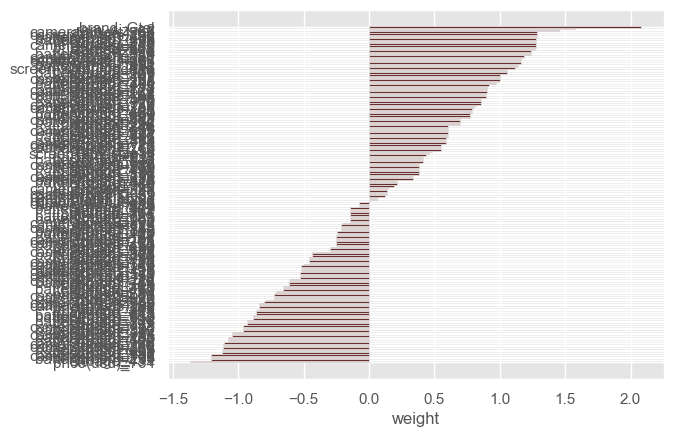

In [350]:
xbar = np.arange(len(data['weight']))
plt.barh(xbar, data['weight'], color = "#682F2F")
plt.yticks(xbar, labels=data['name'])
plt.xlabel('weight')
plt.show()

* In this case, it can be seen that there are factors that are positively related such as camera(pixels)_45, storage_496. While other factors like price(usd)_859, camera(pixels)_87 are negatively related.

In [351]:
#a preprocessing technique, it divides each feature by its standard deviation
from sklearn.preprocessing import StandardScaler

# We will use the data frame where we had created dummy variables scaling all the variables to a range of 0 to 1
X = smartphones_dum
y = smartphones['preference'].astype(int)
# The target variable will be normalized from a ranking to a 1 to 10 score
y = y.apply(lambda x: int(x/len(y)*10))

features = X.columns.values
scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features  

In [352]:
X.head(10)

,brand_Gtel,brand_Hauweii,brand_Itel,brand_apple,brand_samusang,screen_size_large,screen_size_medium,screen_size_small,storage_103,storage_106,storage_114,storage_115,storage_116,storage_118,storage_140,storage_155,storage_168,storage_169,storage_189,storage_192,storage_203,storage_215,storage_216,storage_223,storage_231,storage_235,storage_236,storage_244,storage_272,storage_282,storage_286,storage_301,storage_314,storage_327,storage_340,storage_344,storage_357,storage_358,storage_361,storage_363,storage_365,storage_366,storage_367,storage_383,storage_390,storage_396,storage_425,storage_431,storage_446,storage_451,storage_464,storage_468,storage_476,storage_492,storage_496,storage_497,ram_size_2,ram_size_3,ram_size_4,ram_size_5,ram_size_6,ram_size_7,battery(mph)_108,battery(mph)_134,battery(mph)_137,battery(mph)_153,battery(mph)_160,battery(mph)_168,battery(mph)_185,battery(mph)_236,battery(mph)_246,battery(mph)_302,battery(mph)_316,battery(mph)_325,battery(mph)_376,battery(mph)_379,battery(mph)_385,battery(mph)_401,battery(mph)_426,battery(mph)_427,battery(mph)_449,battery(mph)_491,battery(mph)_494,battery(mph)_507,battery(mph)_512,battery(mph)_519,battery(mph)_553,battery(mph)_560,battery(mph)_568,battery(mph)_569,battery(mph)_589,battery(mph)_595,battery(mph)_622,battery(mph)_630,battery(mph)_631,battery(mph)_635,battery(mph)_692,battery(mph)_723,battery(mph)_760,battery(mph)_765,battery(mph)_806,battery(mph)_813,battery(mph)_819,battery(mph)_833,battery(mph)_873,battery(mph)_910,battery(mph)_914,battery(mph)_951,battery(mph)_970,battery(mph)_982,battery(mph)_990,camera(pixels)_10,camera(pixels)_13,camera(pixels)_16,camera(pixels)_17,camera(pixels)_19,camera(pixels)_21,camera(pixels)_24,camera(pixels)_26,camera(pixels)_27,camera(pixels)_28,camera(pixels)_32,camera(pixels)_33,camera(pixels)_34,camera(pixels)_35,camera(pixels)_36,camera(pixels)_39,camera(pixels)_41,camera(pixels)_43,camera(pixels)_45,camera(pixels)_52,camera(pixels)_53,camera(pixels)_56,camera(pixels)_57,camera(pixels)_62,camera(pixels)_63,camera(pixels)_66,camera(pixels)_68,camera(pixels)_69,camera(pixels)_70,camera(pixels)_73,camera(pixels)_76,camera(pixels)_80,camera(pixels)_81,camera(pixels)_82,camera(pixels)_84,camera(pixels)_87,camera(pixels)_88,camera(pixels)_90,camera(pixels)_96,price(usd)_61,price(usd)_77,price(usd)_79,price(usd)_90,price(usd)_98,price(usd)_121,price(usd)_122,price(usd)_133,price(usd)_155,price(usd)_191,price(usd)_197,price(usd)_201,price(usd)_217,price(usd)_243,price(usd)_245,price(usd)_286,price(usd)_295,price(usd)_327,price(usd)_392,price(usd)_456,price(usd)_466,price(usd)_491,price(usd)_513,price(usd)_516,price(usd)_534,price(usd)_558,price(usd)_580,price(usd)_584,price(usd)_617,price(usd)_627,price(usd)_637,price(usd)_657,price(usd)_661,price(usd)_667,price(usd)_689,price(usd)_713,price(usd)_734,price(usd)_740,price(usd)_771,price(usd)_774,price(usd)_793,price(usd)_859,price(usd)_862,price(usd)_905,price(usd)_908,price(usd)_920,price(usd)_980
0,-0.294884,-0.561951,1.603567,-0.5,-0.5,-0.717741,1.882938,-0.886405,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.204124,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.204124,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,7.000000,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.5,-0.369274,-0.468521,-0.468521,-0.468521,2.478479,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.204124,-0.142857,-0.142857,7.000000,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0

## Perform Ordinial Logistic Regression

In [353]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)

# Running logistic regression model
model = LogisticRegression()
result = model.fit(X_train, y_train)

prediction_test = model.predict(X_test)
# Print the prediction accuracy
print(metrics.mean_squared_error(y_test, prediction_test))

0.76


### Identifying Consumer Preferences that are Positive

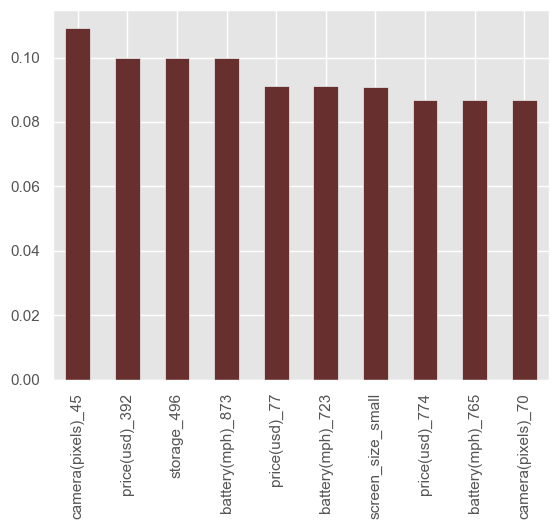

In [354]:
# Get weights of all the variables
weights = pd.Series(model.coef_[0],
                    index=X.columns.values)
plt = (weights.sort_values(ascending = False)[:10]
       .plot(kind='bar',color = '#682F2F'))

* We can see that first 10 variables ('Features') that Model has identified are positively related to the score

### Identifying Consumer Preferences that are Positive

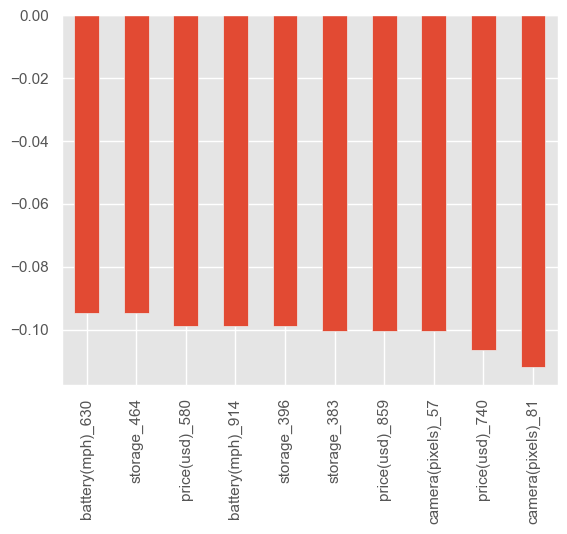

In [355]:
_plt = (weights.sort_values(ascending = False)[-10:]
       .plot(kind='bar'))

## Random Forest Classifier

In [356]:
#To predict preference
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = 0.5,
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print(metrics.mean_squared_error(y_test, prediction_test))

0.64


### Identifying The Most Significant Features

<Axes: >

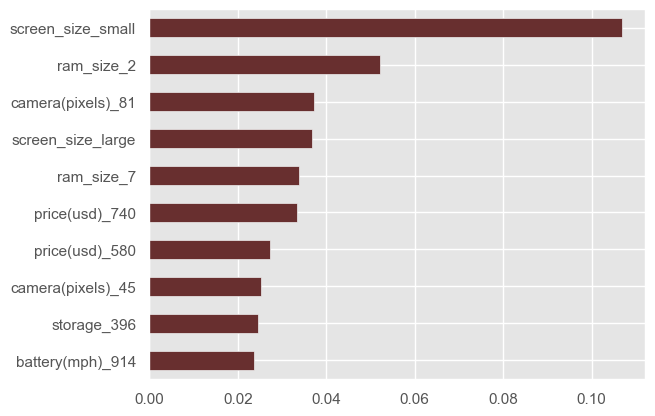

In [357]:
sig = model_rf.feature_importances_
weights = pd.Series(sig,index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh', color = '#682F2F')